# Sprint 7 - Ejercicios de Algoritmos de clasificación

### Ejercicio 1

**Crea almenos dos modelos de classificación diferentes para intentar predecir de la mejor manera posible las clases del archivo adjunto.**

Lo primero que haremos será importar el archivo y hacer una previsualización, una limpieza y una pequeña descripción estadística.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 


ruta_archivo = "C:\\Users\\gemma\\OneDrive\\Escritorio\\It Academy Tasks\\SP 7 T1\\wineData.txt"

#Antes de empezar a trabajar con el archivo he observado queb no las columnas no tienen nombre, 
#de manera que al importar el archivo las añadimos directamente

df_wine = pd.read_csv(ruta_archivo, names=["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])
df_wine.head()



,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df_wine.shape


(178, 14)

Nos encontramos frente a un dataset de 178 registros o filas y 14 columnas. 

**Título del dataset**: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

**Fuentes**:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.
   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991 
   
**Información relevante**: Estos datos son el resultado de un análisis químico de vinos cultivados en la misma región de Italia, pero obtenidos de tres variedades diferentes. El análisis determinó las cantidades de 13 componentes que se encuentran en cada uno de los tres tipos de vinos. 
El dataset consta de 14 columnas: 1 de clase con 3 categorías y 13 variables que son los componentes que se encuentran en cada tipo de vino.

El número de instancias por cada clase son:

* class 1: 59 instancias
* class 2: 71 instancias
* class 3: 48 instancias
      
Lass 13 variables son:


1) **Alcohol**: La cantidad de alcohol en el vino, generalmente se mide en porcentaje de volumen. Es un factor importante que influye en el sabor y la sensación en boca del vino.

2) **Malic acid (Ácido málico)**: Este ácido se encuentra de forma natural en las uvas y es importante para el sabor del vino. Puede contribuir a la acidez y el sabor.

3) **Ash (Ceniza)**: La ceniza se refiere a la cantidad de minerales en el vino después de la evaporación. Puede ser un indicador de la calidad de las uvas utilizadas.

4) **Alcalinity of ash (Alcalinidad de la ceniza)**: La alcalinidad de la ceniza se refiere al nivel de alcalinidad de los minerales en la ceniza. Puede influir en la acidez o la alcalinidad total del vino.

5) **Magnesium (Magnesio)**: El magnesio es un mineral que se encuentra en el vino y puede influir en su sabor y aroma.

6) **Total phenols (Fenoles totales)**: Los fenoles son compuestos químicos en el vino que pueden tener propiedades antioxidantes y afectar al color, sabor y aroma del vino.

7) **Flavanoids (Flavonoides)**: Los flavonoides son un subconjunto de los fenoles y contribuyen al color y sabor del vino. También pueden tener beneficios para la salud.

8) **Nonflavanoid phenols (Fenoles no flavonoides)**: Estos son otros tipos de fenoles que no son flavonoides. También pueden influir en el sabor y color del vino.

9) **Proanthocyanins (Proantocianidinas)**: Son un tipo de flavonoide que contribuye al sabor y color del vino. También pueden tener propiedades antioxidantes.

10) **Color intensity (Intensidad de color)**: La intensidad de color se refiere a la profundidad del color del vino, que puede variar desde rojo claro hasta rojo oscuro o morado en los vinos tintos.

11) **Hue (Tono)**: El tono se refiere a la tonalidad del color del vino, que puede variar desde tonos más anaranjados hasta tonos más azules o morados.

12) **OD280/OD315 of diluted wines (OD280/OD315 de vinos diluidos)**: Este valor es una relación entre las absorbancias de luz a 280 nm y 315 nm en el vino diluido. Puede proporcionar información sobre la concentración de compuestos en el vino.

13) **Proline**: La proline es un aminoácido que se encuentra en el vino y puede influir en su sabor y aroma.

Estas son algunas de las mediciones químicas clave que se utilizan para caracterizar y describir las propiedades de los vinos en un análisis químico. Cada una de estas variables puede tener un impacto en el perfil sensorial y la calidad del vino.

Ahora que ya tenemos una mejor idea de nuestro dataframe vamos a limpiarlo. Miraremos que no haya valores duplicados, valores NULL y valores NAN.



In [3]:
df_wine.drop_duplicates()
df_wine.shape

(178, 14)

In [4]:
df_wine.isnull().sum().sum()

0

In [5]:
df_wine.isna().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [7]:
df_wine_class = df_wine["Class"].value_counts().sort_index()

porcentaje_total_class = round((df_wine_class / len(df_wine))*100,2)

resultados_df_class = pd.DataFrame({
    "Valor": df_wine_class.index,
    "Contador": df_wine_class.values,
    "%": porcentaje_total_class.values
})

resultados_df_class

,Valor,Contador,%
0,1,59,33.15
1,2,71,39.89
2,3,48,26.97


In [8]:
# Cambiamos el tipo de datos de "Class" de int64 a category
df_wine["Class"]=df_wine["Class"].astype("category")
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Class                         178 non-null    category
 1   Alcohol                       178 non-null    float64 
 2   Malic acid                    178 non-null    float64 
 3   Ash                           178 non-null    float64 
 4   Alcalinity of ash             178 non-null    float64 
 5   Magnesium                     178 non-null    int64   
 6   Total phenols                 178 non-null    float64 
 7   Flavanoids                    178 non-null    float64 
 8   Nonflavanoid phenols          178 non-null    float64 
 9   Proanthocyanins               178 non-null    float64 
 10  Color intensity               178 non-null    float64 
 11  Hue                           178 non-null    float64 
 12  OD280/OD315 of diluted wines  178 non-null    floa

Podemos confirmar que el dataset está limpio, no contiene valores duplicados, ni valores null ni nan y las instancias de cada clase coinciden con lo informado en el dataset. Procedemos a hacer una breve descripción numérica y gráfica del dataset en general.

In [9]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


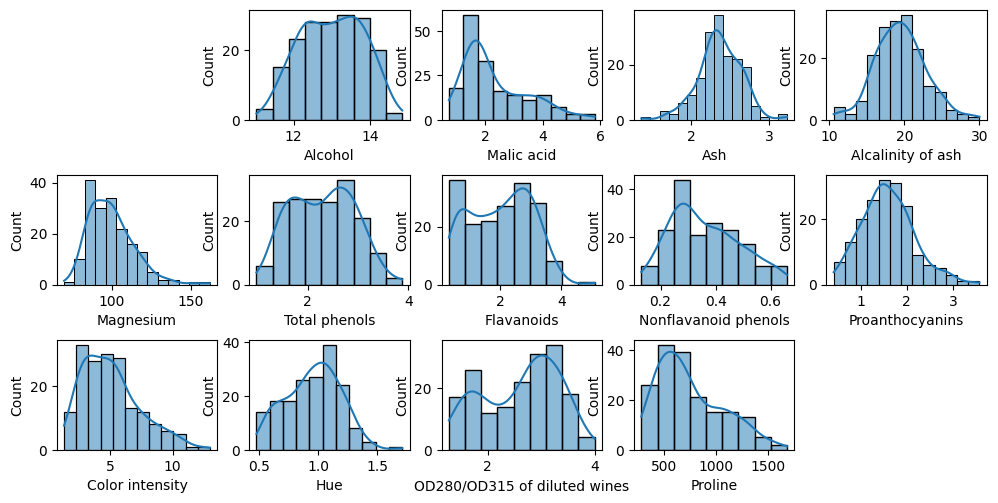

In [10]:
columns = df_wine.columns.drop("Class")

plt.figure(figsize=(12, 10))

for columna in columns:
  
    plt.subplot(5, 5, df_wine.columns.get_loc(columna) + 1)
    sns.histplot(data=df_wine[columna],kde=True)
    plt.xlabel(columna)
    
    plt.subplots_adjust(hspace=0.5)
    
    plt.show

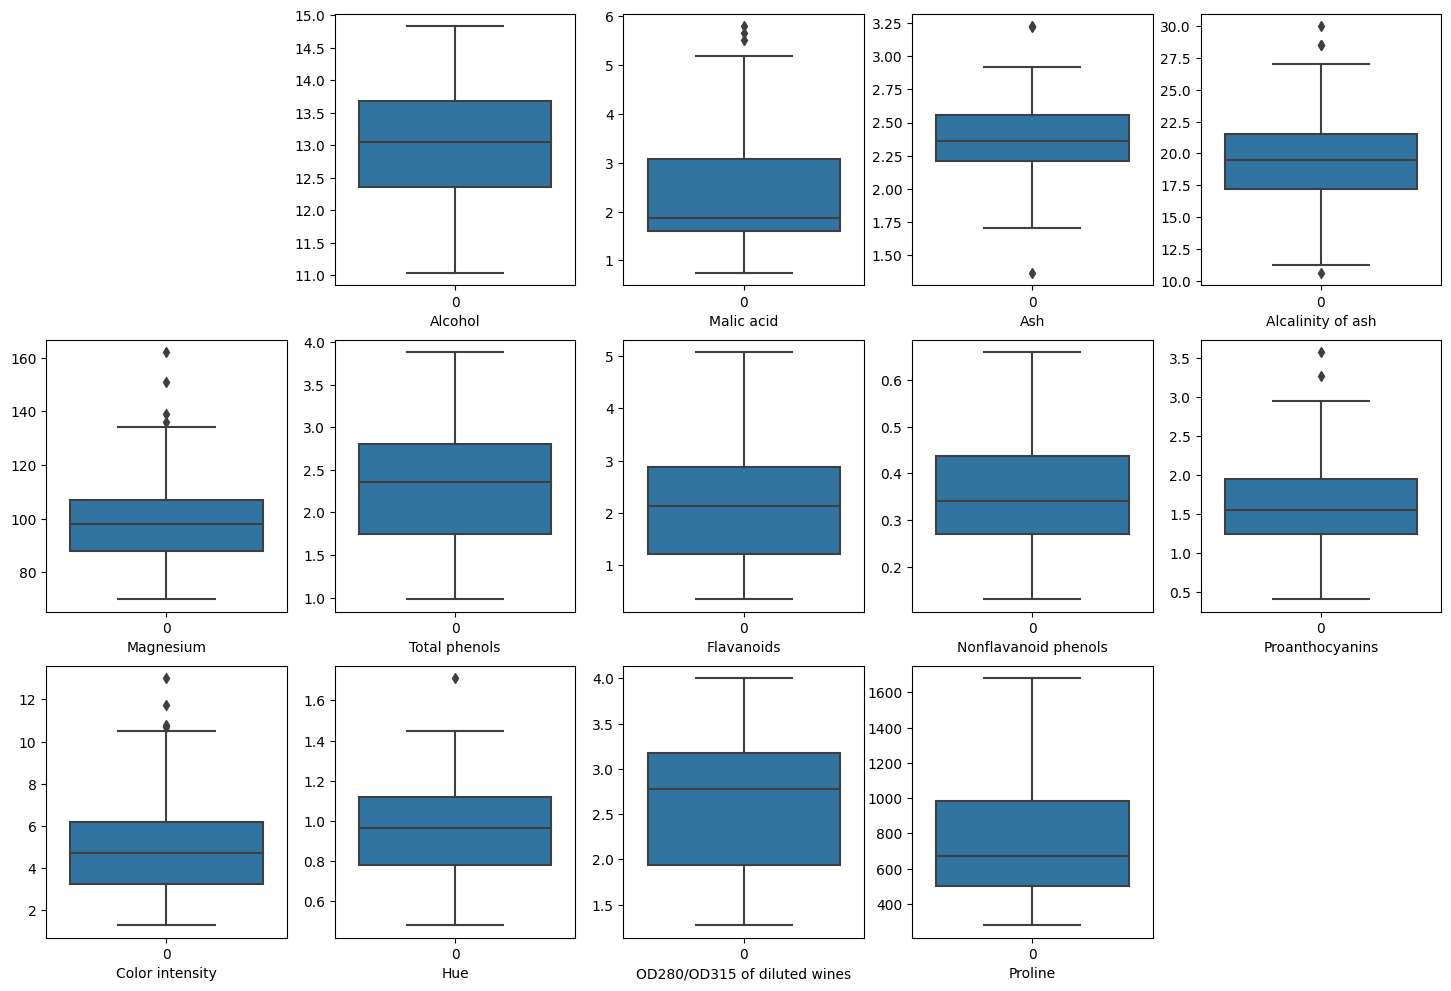

In [11]:
plt.figure(figsize=(18, 12))

for columna in columns:
  
    plt.subplot(3, 5, df_wine.columns.get_loc(columna) + 1)
    sns.boxplot(data=df_wine[columna])
    plt.xlabel(columna)
    
    plt.show

In [12]:
from scipy.stats import shapiro
from tabulate import tabulate

# Creamos una lista para almacenar los resultados de la prueba
resultados = []

 
for columna in df_wine.columns:
    stat, p = shapiro(df_wine[columna])
        
    alpha = 0.05  # Nivel de significancia
    if p > alpha:
        resultado= "Probablemente sigue una distribución normal"
    else:
        resultado= "Probablemente no sigue una distribución normal"
        
    resultados.append([columna, stat, p, resultado])

# Imprimimos los resultados en formato tabular
tabla_resultados = tabulate(resultados, headers=["Columna", "stat", "p", "Resultado"], tablefmt="pretty")
print (tabla_resultados) 


+------------------------------+--------------------+------------------------+------------------------------------------------+
|           Columna            |        stat        |           p            |                   Resultado                    |
+------------------------------+--------------------+------------------------+------------------------------------------------+
|            Class             | 0.8042128086090088 | 3.526998097335039e-14  | Probablemente no sigue una distribución normal |
|           Alcohol            | 0.981804609298706  |  0.020050711929798126  | Probablemente no sigue una distribución normal |
|          Malic acid          | 0.8887840509414673 |  2.94582247484243e-10  | Probablemente no sigue una distribución normal |
|             Ash              | 0.9839476346969604 |  0.038691021502017975  | Probablemente no sigue una distribución normal |
|      Alcalinity of ash       | 0.9902263879776001 |  0.26394858956336975   |  Probablemente sigue una 

Después del breve análisis estadístico podemos observar que a pesar de que muchas de las variables parece que tengan una distribución normal, sólo la variable "Alcalinity of ash" la tiene. También observamos que de las 13 variables, 7 contienen outliers.

Las variables: "Alcohol", "Ash", "Total phenols","Nonflavanoid phenols","Proanthocyanins","Hue" y "OD280/OD315 of diluted wines" tienen una desviación estandard pequeña, lo que nos indica que los valores están bastante concentrados. Tal y cómo podemos observar en las gráficas. Por otra parte las variables "Magnsium" y "Proline" tienen unas desviaciones muy altas, en especial "Proline" lo cual indica que hay una dispersión de los datos elevada.

El siguiente paso será estandarizar los datos de las variables para luego poder trabajar con ellos.

En este caso usaremos tres tipos:

* **MinMax** para estandarizar las variables que no tienen una distribución normal, pero que no tienen outliers: "Alcohol", "Total phenols","Flavanoids","Nonflavanoid phenols","OD280/OD315 of diluted wines" y "Proline".

* **Robust Scaler** para estandarizar las variables que tienen outliers y no siguen una distribución normal:  "Malic acid","Ash","Alcalinity of ash","Magnesium","Proanthocyanins","Color intensity" y "Hue".

* **Standard Scaler** para normalizar la variable que tiene una distribución normal independientemente de que tenga outliers: "Alcalinity of Ash"




In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Especificamos las columnas a escalar
columnas_a_escalar = ["Alcohol", "Total phenols","Flavanoids","Nonflavanoid phenols","OD280/OD315 of diluted wines","Proline"]

df_wine_scaled = df_wine.copy()  # Creamos una copia del DataFrame original
df_wine_scaled[columnas_a_escalar] = scaler.fit_transform(df_wine[columnas_a_escalar])
df_wine_scaled = df_wine_scaled.round(4)
df_wine_sd = df_wine_scaled.copy()

display(df_wine_sd)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.8421,1.71,2.43,15.6,127,0.6276,0.5738,0.2830,2.29,5.64,1.04,0.9707,0.5613
1,1,0.5711,1.78,2.14,11.2,100,0.5759,0.5105,0.2453,1.28,4.38,1.05,0.7802,0.5506
2,1,0.5605,2.36,2.67,18.6,101,0.6276,0.6118,0.3208,2.81,5.68,1.03,0.6960,0.6469
3,1,0.8789,1.95,2.50,16.8,113,0.9897,0.6646,0.2075,2.18,7.80,0.86,0.7985,0.8573
4,1,0.5816,2.59,2.87,21.0,118,0.6276,0.4958,0.4906,1.82,4.32,1.04,0.6081,0.3260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.7053,5.65,2.45,20.5,95,0.2414,0.0570,0.7358,1.06,7.70,0.64,0.1722,0.3295
174,3,0.6237,3.91,2.48,23.0,102,0.2828,0.0865,0.5660,1.41,7.30,0.70,0.1062,0.3367
175,3,0.5895,4.28,2.26,20.0,120,0.2103,0.0738,0.5660,1.35,10.20,0.59,0.1062,0.3973
176,3,0.5632,2.59,2.37,20.0,120,0.2310,0.0717,0.7547,1.46,9.30,0.60,0.1282,0.4009


In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

#Especificamos las columnas a escalar:
columnas_a_escalar= ["Malic acid","Ash","Magnesium","Proanthocyanins","Color intensity","Hue"]

df_wine_scaled = df_wine_sd.copy()  # Creamos una copia del DataFrame original
df_wine_scaled[columnas_a_escalar] = scaler.fit_transform(df_wine_sd[columnas_a_escalar])

df_wine_scaled = df_wine_scaled.round(4)

df_wine_def = df_wine_scaled.copy()

display(df_wine_def)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.8421,-0.1047,0.2014,15.6,1.5263,0.6276,0.5738,0.2830,1.0500,0.3188,0.2222,0.9707,0.5613
1,1,0.5711,-0.0574,-0.6331,11.2,0.1053,0.5759,0.5105,0.2453,-0.3929,-0.1040,0.2519,0.7802,0.5506
2,1,0.5605,0.3345,0.8921,18.6,0.1579,0.6276,0.6118,0.3208,1.7929,0.3322,0.1926,0.6960,0.6469
3,1,0.8789,0.0574,0.4029,16.8,0.7895,0.9897,0.6646,0.2075,0.8929,1.0436,-0.3111,0.7985,0.8573
4,1,0.5816,0.4899,1.4676,21.0,1.0526,0.6276,0.4958,0.4906,0.3786,-0.1242,0.2222,0.6081,0.3260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.7053,2.5574,0.2590,20.5,-0.1579,0.2414,0.0570,0.7358,-0.7071,1.0101,-0.9630,0.1722,0.3295
174,3,0.6237,1.3818,0.3453,23.0,0.2105,0.2828,0.0865,0.5660,-0.2071,0.8758,-0.7852,0.1062,0.3367
175,3,0.5895,1.6318,-0.2878,20.0,1.1579,0.2103,0.0738,0.5660,-0.2929,1.8490,-1.1111,0.1062,0.3973
176,3,0.5632,0.4899,0.0288,20.0,1.1579,0.2310,0.0717,0.7547,-0.1357,1.5470,-1.0815,0.1282,0.4009


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalizamos la columna "Alcalinity of ash"
columna_para_estandarizar = df_wine_def[["Alcalinity of ash"]]
columna_estandarizada = scaler.fit_transform(columna_para_estandarizar)

# Reemplazamos la columna original con la columna estandarizada
df_wine_def["Alcalinity of ash"] = columna_estandarizada

df_wine_def


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.8421,-0.1047,0.2014,-1.169593,1.5263,0.6276,0.5738,0.2830,1.0500,0.3188,0.2222,0.9707,0.5613
1,1,0.5711,-0.0574,-0.6331,-2.490847,0.1053,0.5759,0.5105,0.2453,-0.3929,-0.1040,0.2519,0.7802,0.5506
2,1,0.5605,0.3345,0.8921,-0.268738,0.1579,0.6276,0.6118,0.3208,1.7929,0.3322,0.1926,0.6960,0.6469
3,1,0.8789,0.0574,0.4029,-0.809251,0.7895,0.9897,0.6646,0.2075,0.8929,1.0436,-0.3111,0.7985,0.8573
4,1,0.5816,0.4899,1.4676,0.451946,1.0526,0.6276,0.4958,0.4906,0.3786,-0.1242,0.2222,0.6081,0.3260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.7053,2.5574,0.2590,0.301803,-0.1579,0.2414,0.0570,0.7358,-0.7071,1.0101,-0.9630,0.1722,0.3295
174,3,0.6237,1.3818,0.3453,1.052516,0.2105,0.2828,0.0865,0.5660,-0.2071,0.8758,-0.7852,0.1062,0.3367
175,3,0.5895,1.6318,-0.2878,0.151661,1.1579,0.2103,0.0738,0.5660,-0.2929,1.8490,-1.1111,0.1062,0.3973
176,3,0.5632,0.4899,0.0288,0.151661,1.1579,0.2310,0.0717,0.7547,-0.1357,1.5470,-1.0815,0.1282,0.4009


**Procederemos a crear el primer modelo de clasificación y para ello usaremos el modelo ARBOL DE DECISIÓN.**
Para este modelo no es necesario estandarizar los datos. Pero si que es necesario que dividamos los datos entre Train y Test. Hay que tener en cuenta que nuestra X serán todas las columnas de la 2 a la 14- Y nuestro target **y** será la columna 1.

In [16]:
from sklearn.model_selection import train_test_split

X= df_wine_def.drop("Class", axis=1)
y= df_wine_def["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

print("Tamaño de conjunto de entrenamiento:", len(X_train))
print("Tamaño de conjunto de prueba:", len(X_test))



Tamaño de conjunto de entrenamiento: 142
Tamaño de conjunto de prueba: 36


Una vez tenemos nuestro conjunto de entrenamiento y de prueba. Procederemos a crear el modelo de **Arbol de decisión**.

In [17]:
from sklearn import tree

arbol_decision = tree.DecisionTreeClassifier()
arbol_wine = arbol_decision.fit(X_train, y_train)



# Calculamos la precisión de clasificación del modelo.

accuracy = arbol_decision.score(X_test , y_test)
print("Precisión del modelo:", accuracy)



Precisión del modelo: 0.9444444444444444


In [18]:
y_pred_ab = arbol_decision.predict(X_test)

print("Predicciones del modelo en el conjunto de prueba:")
print(y_pred_ab)

Predicciones del modelo en el conjunto de prueba:
[3 1 3 3 2 3 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 2 2 2 1 3 2 3 3 3 2 1 3 2 2 2]


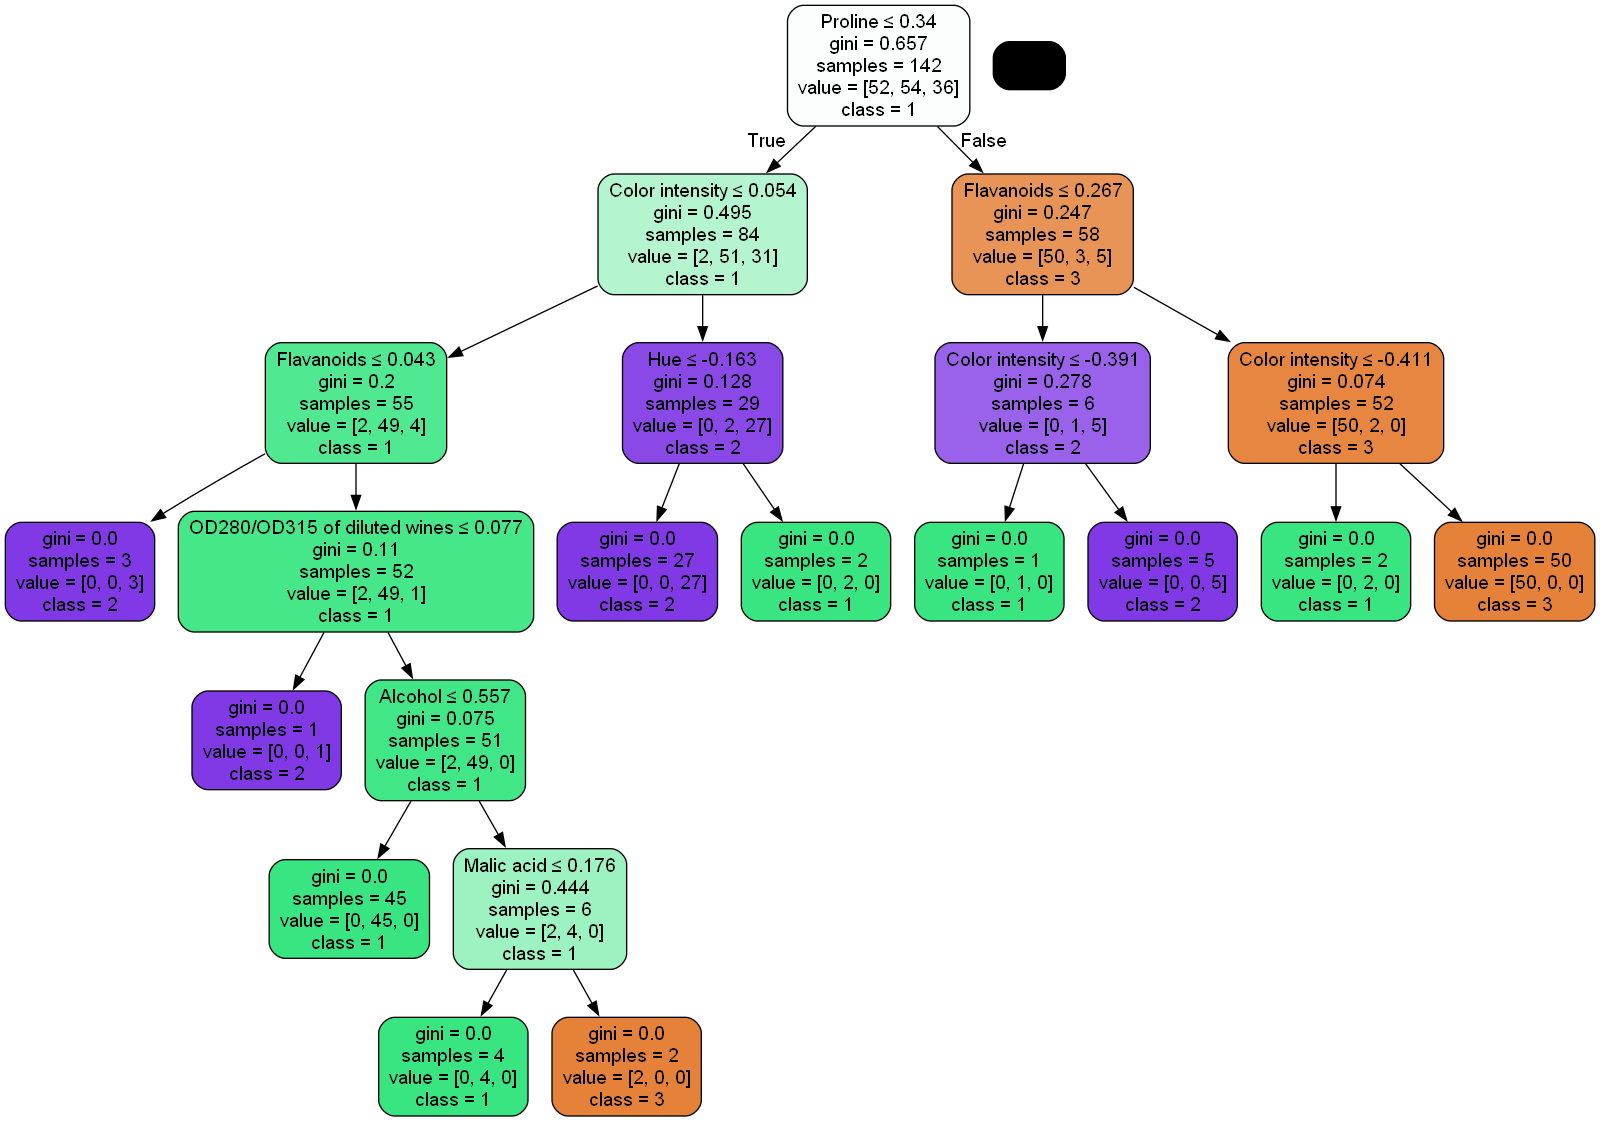

In [19]:
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image


# Visualizamos el árbol
dot_data = tree.export_graphviz(arbol_wine, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=[str(c) for c in y_train.unique()],
                                filled=True, rounded=True, special_characters=True)


# Creamos el objeto graphviz
graph = pydotplus.graph_from_dot_data(dot_data)

# Renderizamos el árbol y mostrarmos en el Notebook
Image(graph.create_png())

Podemos observar visualmente el Arbol de Decisión creado con una precisión del 94%. Esto es debido a que tiene una produndidad de 6. El modelo ha elegido la variable "Proline" como raiz. Se tendrían que ajustar los hiperparámetros, aunque posiblemente nos daría un resultado menos precioso, pero si que no estaría sobreajustado. Observamos que a lo largo del arbol de decisión el **índice Gini** es bastante pequeño, y se va haciendo más pequeño a medida que bajamos de nodo.  Esto significa que la pureza de los datos es muy buena.

EL siguiente modelo de Clasificación que usaremos para nuestro ejercicio es el **Modelo KNN**, modelo de aprendizaje automático utilizado tanto para clasificación como para regresión. La idea principal es que los elementos de datos similares tienden a estar cerca unos de otros. 

In [20]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=5) # Ponemos un valor de 5 vecinos a comparar

# Entrenamos el modelo
knn_wine = knn_model.fit(X_train, y_train)

# Realizamos las predicciones con los datos de prueba
y_pred_knn = knn_model.predict(X_test)

print("Predicciones del modelo en el conjunto de prueba:")
print(y_pred_knn)


Predicciones del modelo en el conjunto de prueba:
[3 1 3 3 2 3 2 1 2 3 1 2 3 2 2 2 1 3 1 1 2 1 2 1 1 3 2 3 3 2 2 1 3 2 2 1]


C:\Users\gemma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
# Evaluamos el rendimiento del modelo calculando la precisión:

accuracy = accuracy_score(y_test, y_pred_knn)
print("Precisión del modelo KNN:", accuracy)


Precisión del modelo KNN: 0.8611111111111112


### Ejercicio 2


**Compara los modelos de classificación utilitzando la precisión (accuracy), una matriz de confusión y otras métricas más avanzadas.**


Para poder comparar la clasificación de nuestros modelos crearemos una **matriz de confusión** para cada uno de ellos. Esta matrix proporciona una visión detallada de cómo un modelo de clasificación está realizando predicciones en comparación con las clases reales.

In [22]:
from sklearn.metrics import confusion_matrix

matriz_confusion_ab = confusion_matrix(y_test, y_pred_ab)
print(matriz_confusion_ab)


[[ 7  0  0]
 [ 0 17  0]
 [ 1  1 10]]


In [23]:
matriz_confusion_knn = confusion_matrix(y_test, y_pred_knn)
print(matriz_confusion_knn)

[[ 7  0  0]
 [ 4 13  0]
 [ 0  1 11]]


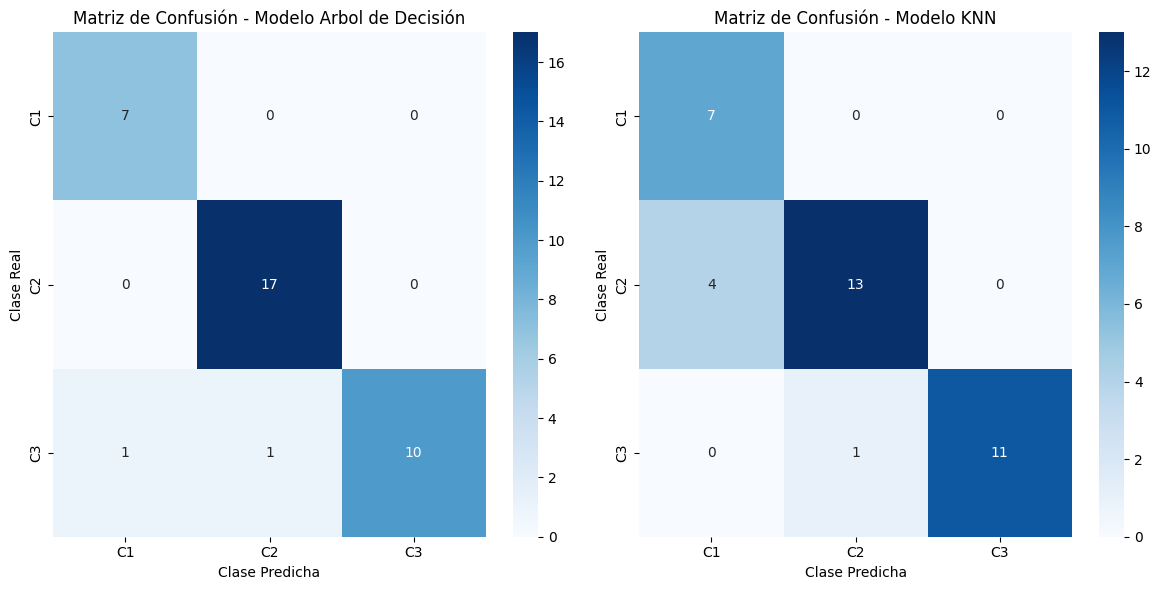

In [24]:
# Definimos las etiquetas
class_labels = ["C1", "C2","C3"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusión para el modelo Arbol de Decisión
sns.heatmap(matriz_confusion_ab, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_xlabel("Clase Predicha")
axes[0].set_ylabel("Clase Real")
axes[0].set_title("Matriz de Confusión - Modelo Arbol de Decisión")

# Matriz de confusión para el modelo KNN
sns.heatmap(matriz_confusion_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_xlabel("Clase Predicha")
axes[1].set_ylabel("Clase Real")
axes[1].set_title("Matriz de Confusión - Modelo KNN")


plt.tight_layout()

plt.show()


Con la visualización de ambas matrices de confusión, podemos confirmar que es mucho más efectiva la clasificación que ha realizado el Arbol de Decisión. Ya que sólo se ha equivocado en clasificar tres vinos, mientras que la matriz de confusión del modelo Knn nos muestra que el modelo se ha equivocado en la predicción de 5 muestras.

Además de la matriz de confusión hay otras medidas para poder evaluar las clasificaciones realizadas. Algunas de las más importantes son:

* **Accuracy** o Exactitud: se calcula como la proporción de predicciones correctas (positivas y negativas) en relación al número total de predicciones. Cuanto más alta sea la precisión, mejor es el rendimiento del modelo, ya que indica que el modelo está acertando con más frecuencia.

* **Precision**: se calcula como la proporción de predicciones positivas que son correctas,  en relación a todas las predicciones que el modelo ha etiquetado como esa clase (correctas e incorrectas). Para saber cuantas de las predicciones de esa clase son verdaderas.

* **Recall** o **Sensitividad**: mide la capacidad del modelo para identificar correctamente los casos positivos reales en relación a todos los casos positivos reales (positivos reales y falsos negativos) presentes en el conjunto de datos.

* **F1 score**: métrica que combina precisión y sensibilidad en una sola puntuación. Se calcula como 2 * (Precisión * Sensibilidad) / (Precisión + Sensibilidad). Es útil cuando deseas encontrar un equilibrio entre la precisión y la sensibilidad.



La **accuracy** ya las calculamos en el ejercicio anterior. Pero las volveremos a calcular y comparar aquí.



In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Calcular las métricas para el árbol de decisión
accuracy_arbol = accuracy_score(y_test, y_pred_ab)
precision_arbol_avg = precision_score(y_test, y_pred_ab, average='macro')
precision_arbol = precision_score(y_test, y_pred_ab, average=None)
recall_arbol_avg = recall_score(y_test, y_pred_ab, average='macro')
recall_arbol = recall_score(y_test, y_pred_ab, average=None)
f1_score_arbol_avg = f1_score(y_test, y_pred_ab, average='macro')
f1_score_arbol = f1_score(y_test, y_pred_ab, average=None)
#specificity_arbol = (y_pred_ab[y_test == 0] == 0).sum() / (y_test == 0).sum()

# Calcular las métricas para k-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn_avg = precision_score(y_test, y_pred_knn, average='macro')
precision_knn = precision_score(y_test, y_pred_knn, average=None)
recall_knn_avg = recall_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average=None)
f1_score_knn_avg = f1_score(y_test, y_pred_knn, average='macro')
f1_score_knn = f1_score(y_test, y_pred_knn, average=None)
#specificity_knn = (y_pred_knn[y_test == 0] == 0).sum() / (y_test == 0).sum()


# Crear un DataFrame para comparar las métricas
data = {
    "Modelo": ["Árbol de Decisión", "k-Nearest Neighbors"],
    "Accuracy": [accuracy_arbol, accuracy_knn],
    "Precision Media": [precision_arbol_avg,precision_knn_avg],
    "Precision Clase 1": [precision_arbol[0],precision_knn[0]],  # Precisión para la clase 0
    "Precision Clase 2": [precision_arbol[1],precision_knn[1]],  # Precisión para la clase 1
    "Precision Clase 3": [precision_arbol[2], precision_knn[2]], # Precisión para la clase 2
    "Recall media": [recall_arbol_avg,recall_knn_avg],
    "Recall Clase 1": [recall_arbol[0],recall_knn[0]],  # Recuperación para la clase 0
    "Recall Clase 2": [recall_arbol[1],recall_knn[1]], # Recuperación para la clase 1
    "Recall Clase 3": [recall_arbol[2], recall_knn[2]], # Recuperación para la clase 2
    "F1 Score media": [f1_score_arbol_avg,f1_score_knn_avg],
    "F1 Score Clase 1": [f1_score_arbol[0],f1_score_knn[0]],  # Puntuación F1 para la clase 0
    "F1 Score Clase 2": [f1_score_arbol[1], f1_score_knn[1]], # Puntuación F1 para la clase 1
    "F1 Score Clase 3": [f1_score_arbol[2],f1_score_knn[2]],  # Puntuación F1 para la clase 2
    #'Specificity': [specificity_arbol, specificity_knn]
}

df = pd.DataFrame(data)
df = df.set_index("Modelo")
df.T




Modelo,Árbol de Decisión,k-Nearest Neighbors
Accuracy,0.944444,0.861111
Precision Media,0.939815,0.854978
Precision Clase 1,0.875000,0.636364
Precision Clase 2,0.944444,0.928571
Precision Clase 3,1.000000,1.000000
Recall media,0.944444,0.893791
Recall Clase 1,1.000000,1.000000
Recall Clase 2,1.000000,0.764706
Recall Clase 3,0.833333,0.916667
F1 Score media,0.937951,0.857670


Comparando los valores de ambos modelos, confirmamos que el modelo de Arbol de Decisión es más exacto (accuracy del 94%) a la hora de clasificar. Aunque para la clase 3 de Class vemos que recall y f1 score son méjores.

Evaluando la precisión general, y el F1 score de ambos modelos, podemos determinar que en este ejercicio el modelo de Arbol de Decisión tiene una precisión más elevada que el modelo KNN. Aunque cuando lo separamos por clases, vemos que el modelo de Arbol ha clasificado correctamente menos referencias



###  Ejercicio 3 y Ejercicio 4

**Entrena los modelos usando diferentes parámetros que admiten con la finalidad de mejorar sus predicciones.**

**Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.**


Para este ejercicio usaré GridSearchCV, una técnica utilizada en aprendizaje automático para encontrar la mejor combinación de hiperparámetros para un modelo dado, a través de la evaluación de múltiples configuraciones. Esta técnica es particularmente útil para optimizar el rendimiento de un modelo al ajustar los hiperparámetros.

Un hiperparámetro es un parámetro que no se aprende directamente del conjunto de datos durante el entrenamiento de un modelo de aprendizaje automático, sino que debe configurarse antes de iniciar el proceso de entrenamiento. Los hiperparámetros controlan diferentes aspectos del modelo y su comportamiento, y su elección adecuada es esencial para lograr un modelo de alta calidad y capacidad de generalización.

Los hiperparámetros más usuales para el modelo de **Arbol de decisión** son:

* **Profundidad máxima del árbol (max_depth)**: Controla la profundidad máxima del árbol. Un árbol más profundo puede aprender relaciones más complejas en los datos, pero también puede ser propenso al sobreajuste. Limitar la profundidad máxima puede ayudar a prevenir el sobreajuste.

* **Mínimo de muestras para dividir un nodo (min_samples_split)**: Define el número mínimo de muestras requerido para dividir un nodo en dos nodos hijos. Establecer este hiperparámetro puede evitar divisiones en nodos con un número muy pequeño de muestras, lo que ayuda a prevenir el sobreajuste.

* **Mínimo de muestras por hoja (min_samples_leaf)**: Establece el número mínimo de muestras que deben existir en una hoja del árbol. Esto ayuda a controlar el tamaño de las hojas y, al igual que min_samples_split, puede ayudar a prevenir el sobreajuste.

* **Máximo número de características a considerar en cada división (max_features)**: controla el número máximo de características que se considerarán al dividir un nodo. Puede ser útil para reducir la complejidad del modelo y evitar el sobreajuste.

* **Criterio de decisión (criterion)**: Especifica la función que se utiliza para medir la calidad de una división en un nodo. Los dos criterios más comunes son **"gini"** (coeficiente de Gini) y **"entropía"** (medida de la impureza). Puedes elegir el criterio que mejor se ajuste a tus necesidades.

* **Número mínimo de nodos requeridos para dividir un nodo interno (min_samples_split)**: Define el número mínimo de nodos que deben existir en un nodo interno antes de considerar una división. Este parámetro también puede ayudar a evitar divisiones en nodos con un número muy pequeño de nodos internos, lo que previene el sobreajuste.

* **Método de selección de características (splitter)**: Especifica el método utilizado para elegir la característica que se utilizará en cada división. Los dos métodos más comunes son "best" (elige la mejor característica) y "random" (elige una característica al azar).



In [26]:
from sklearn.model_selection import GridSearchCV


arbol_wine.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Para este ejercicio elegiremos 3 hiperparámetros para modificar: "max_depth", "criterion" y "min_samples_split".

In [28]:
param_grid = {
    "max_depth": [4,5,6],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2,3,4]
}
clf_1 = GridSearchCV(arbol_wine, param_grid, n_jobs=-1, cv=5, return_train_score=False)

# Ajustamos el modelo de búsqueda a tus datos, utilizando datos de entrenamiento
clf_1.fit(X_train, y_train)  

# Obtenemos los resultados de la búsqueda en un DataFrame
df_clf_1 = pd.DataFrame(clf_1.cv_results_)

# Ordenamos los resultados por rango de prueba (mejores combinaciones primero)
resultados_ordenados = df_clf_1[['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score', ascending=True)

# Mostramos los resultados ordenados
print(resultados_ordenados)


    mean_test_score  rank_test_score
12         0.936946                1
17         0.936700                2
16         0.916256                3
10         0.916010                4
9          0.915764                5
11         0.909113                6
15         0.908867                7
14         0.901970                8
13         0.901970                8
1          0.894335               10
2          0.894089               11
0          0.893842               12
8          0.886700               13
4          0.880296               14
6          0.873153               15
7          0.873153               15
3          0.866256               17
5          0.858867               18


Como hemos podido observar el resultado es una tabla que muestra las combinaciones de hiperparámetros probadas, el puntaje promedio de prueba y el rango de puntaje de prueba. Esto permite identificar cuáles son los mejores hiperparámetros para el modelo de regresión lineal en función de su rendimiento en la validación cruzada.

La combinación con rango 1 y puntaje promedio de prueba de aproximadamente 0,9369 son las mejores en términos de rendimiento en la prueba. 

Lo primero que haremos es ver que hiperparámetros ha usado la combinación número 12. Y después volveremos a crear el modelo con esta mejor combinación.


In [29]:
mejores_hiperp_a_decision= clf_1.best_params_
print("Mejor combinación de hiperparámetros:")
print(mejores_hiperp_a_decision)

Mejor combinación de hiperparámetros:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [35]:
from sklearn.tree import DecisionTreeClassifier
modelo_mejorado_arbol = DecisionTreeClassifier(
    max_depth=mejores_hiperp_a_decision['max_depth'],
    criterion=mejores_hiperp_a_decision['criterion'],
    min_samples_split=mejores_hiperp_a_decision['min_samples_split']
)

# Entrenamos el modelo con tus datos de entrenamiento
modelo_mejorado_arbol.fit(X_train, y_train)

# Ahora puedes utilizar este modelo entrenado para hacer predicciones
y_pred_ab_mej = modelo_mejorado_arbol.predict(X_test)


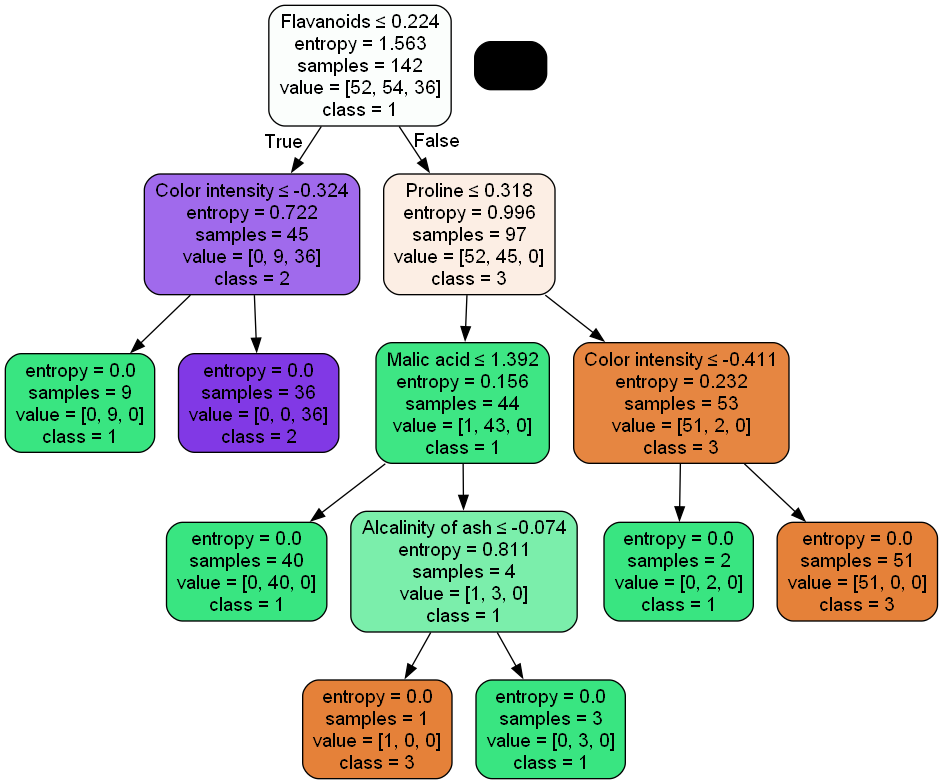

In [31]:
# Visualizamos el árbol
dot_data = tree.export_graphviz(modelo_mejorado_arbol, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=[str(c) for c in y_train.unique()],
                                filled=True, rounded=True, special_characters=True)


# Creamos el objeto graphviz
graph = pydotplus.graph_from_dot_data(dot_data)

# Renderizamos el árbol y mostrarmos en el Notebook
Image(graph.create_png())

In [36]:
from sklearn.metrics import confusion_matrix

matriz_confusion_ab_mej = confusion_matrix(y_test, y_pred_ab_mej)
print(matriz_confusion_ab_mej)


[[ 7  0  0]
 [ 1 16  0]
 [ 0  1 11]]


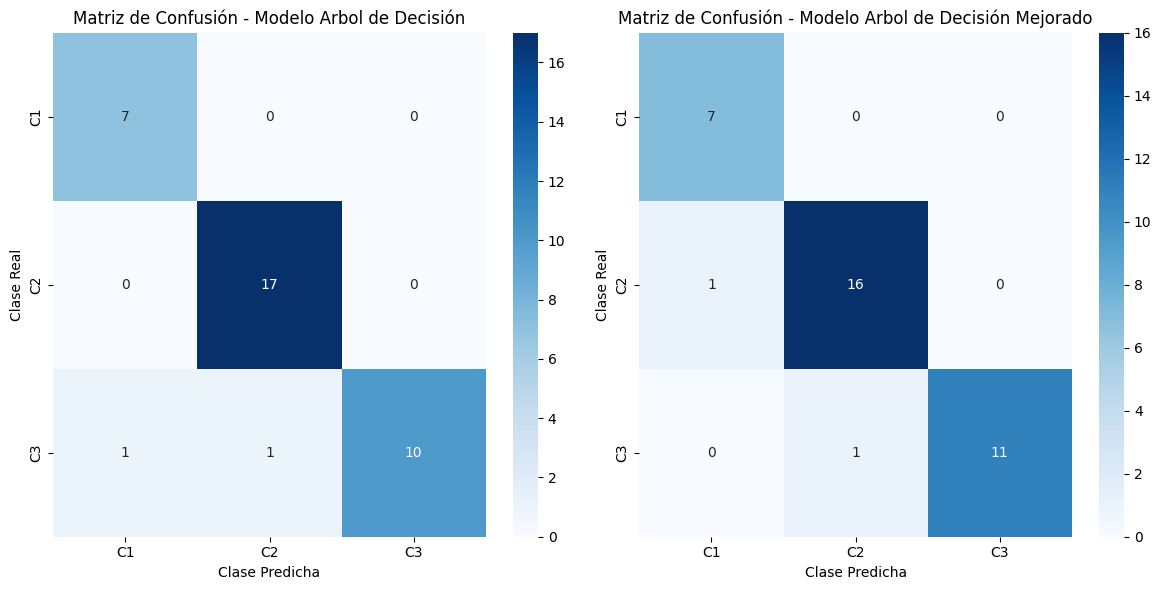

In [37]:
# Definimos las etiquetas
class_labels = ["C1", "C2","C3"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusión para el modelo Arbol de Decisión
sns.heatmap(matriz_confusion_ab, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_xlabel("Clase Predicha")
axes[0].set_ylabel("Clase Real")
axes[0].set_title("Matriz de Confusión - Modelo Arbol de Decisión")

# Matriz de confusión para el modelo Arbol de Decisión Mejorado
sns.heatmap(matriz_confusion_ab_mej, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_xlabel("Clase Predicha")
axes[1].set_ylabel("Clase Real")
axes[1].set_title("Matriz de Confusión - Modelo Arbol de Decisión Mejorado")


plt.tight_layout()

plt.show()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Calculamos las métricas para el árbol de decisión
accuracy_arbol = accuracy_score(y_test, y_pred_ab)
precision_arbol_avg = precision_score(y_test, y_pred_ab, average='macro')
precision_arbol = precision_score(y_test, y_pred_ab, average=None)
recall_arbol_avg = recall_score(y_test, y_pred_ab, average='macro')
recall_arbol = recall_score(y_test, y_pred_ab, average=None)
f1_score_arbol_avg = f1_score(y_test, y_pred_ab, average='macro')
f1_score_arbol = f1_score(y_test, y_pred_ab, average=None)


# Calculamos las métricas para el árbol de decisión modificado
accuracy_ab_mod = accuracy_score(y_test, y_pred_ab_mej)
precision_ab_mod_avg = precision_score(y_test, y_pred_ab_mej, average='macro')
precision_ab_mod = precision_score(y_test, y_pred_ab_mej, average=None)
recall_ab_mod_avg = recall_score(y_test, y_pred_ab_mej, average='macro')
recall_ab_mod = recall_score(y_test, y_pred_ab_mej, average=None)
f1_score_ab_mod_avg = f1_score(y_test, y_pred_ab_mej, average='macro')
f1_score_ab_mod = f1_score(y_test, y_pred_ab_mej, average=None)



# Creamos un DataFrame para comparar las métricas
data = {
    "Modelo": ["Árbol de Decisión", "Árbol Modificado"],
    "Accuracy": [accuracy_arbol, accuracy_ab_mod],
    "Precision Media": [precision_arbol_avg,precision_ab_mod_avg],
    "Precision Clase 1": [precision_arbol[0],precision_ab_mod[0]],  # Precisión para la clase 0
    "Precision Clase 2": [precision_arbol[1],precision_ab_mod[1]],  # Precisión para la clase 1
    "Precision Clase 3": [precision_arbol[2], precision_ab_mod[2]], # Precisión para la clase 2
    "Recall media": [recall_arbol_avg,recall_ab_mod_avg],
    "Recall Clase 1": [recall_arbol[0],recall_ab_mod[0]],  # Recuperación para la clase 0
    "Recall Clase 2": [recall_arbol[1],recall_ab_mod[1]], # Recuperación para la clase 1
    "Recall Clase 3": [recall_arbol[2], recall_ab_mod[2]], # Recuperación para la clase 2
    "F1 Score media": [f1_score_arbol_avg,f1_score_ab_mod_avg],
    "F1 Score Clase 1": [f1_score_arbol[0],f1_score_ab_mod[0]],  # Puntuación F1 para la clase 0
    "F1 Score Clase 2": [f1_score_arbol[1], f1_score_ab_mod[1]], # Puntuación F1 para la clase 1
    "F1 Score Clase 3": [f1_score_arbol[2],f1_score_ab_mod[2]],  # Puntuación F1 para la clase 2
    #'Specificity': [specificity_arbol, specificity_knn]
}

df_mod = pd.DataFrame(data)
df_mod = df_mod.set_index("Modelo")
df_mod.T




Modelo,Árbol de Decisión,Árbol Modificado
Accuracy,0.944444,0.944444
Precision Media,0.939815,0.938725
Precision Clase 1,0.875000,0.875000
Precision Clase 2,0.944444,0.941176
Precision Clase 3,1.000000,1.000000
Recall media,0.944444,0.952614
Recall Clase 1,1.000000,1.000000
Recall Clase 2,1.000000,0.941176
Recall Clase 3,0.833333,0.916667
F1 Score media,0.937951,0.943677


Ahora haremos lo mismo con el modelo KNN. Vamos a ver qué hiperparámetros usa y qué significa cada uno y luego decidiremos cuales modificamos. Para ver cómo varía. Los hiperparámtros del **modelo KNN** son:

* **Número de vecinos (n_neighbors)**: determina cuántos vecinos se deben considerar al realizar una predicción. 

* **Método de ponderación (weights)**: cómo se ponderan las contribuciones de los vecinos. Puede ser "uniform" (todos los vecinos tienen el mismo peso) o "distance" (los vecinos más cercanos tienen un mayor peso en la predicción).

* **Función de distancia (p)**: define la función de distancia utilizada en la métrica de distancia de Minkowski. Los valores comunes son 1 (distancia de Manhattan) y 2 (distancia euclidiana), también se pueden utilizar otros valores.

* **Algoritmo de búsqueda (algorithm)**: permite elegir entre diferentes algoritmos para buscar los vecinos más cercanos. Los dos algoritmos comunes son "brute" (fuerza bruta) y "kd_tree" (árbol k-d), también puedes usar "ball_tree" o "auto" (selecciona automáticamente el algoritmo más adecuado).

* **Métrica de distancia (metric)**: especifica la métrica de distancia a utilizar. Por defecto, se utiliza la distancia euclidiana, pero puedes seleccionar otras métricas, como la distancia de Manhattan (manhattan), la distancia de Chebyshev (chebyshev).

* **Número de hilos/cores (n_jobs)**: Controla la cantidad de núcleos de CPU utilizados para el cálculo. Un valor de -1 significa utilizar todos los núcleos disponibles.

* **Peso de clase (class_weight)**: si trabajas con problemas de clasificación desequilibrados, puedes asignar pesos diferentes a las clases para equilibrar el modelo.

* **Número de hojas de hoja (leaf_size)**: controla el tamaño de las hojas en el árbol k-d cuando se utiliza el algoritmo "kd_tree".



In [41]:
from sklearn.model_selection import GridSearchCV

knn_wine.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Para este ejercicio eligiremos 3 hiperparámetros para modifificar: "n_neighbors", "weights" y "p".

In [42]:
param_grid_knn = {
    "n_neighbors": [3,5,7],
    "weights": ["uniform", "distance"],
    "p": [1,2]
}
clf_1_knn = GridSearchCV(knn_wine, param_grid_knn, n_jobs=-1, cv=5, return_train_score=False)

# Ajustamos el modelo de búsqueda a tus datos, utilizando datos de entrenamiento
clf_1_knn.fit(X_train, y_train)  

# Obtenemos los resultados de la búsqueda en un DataFrame
df_clf_1_knn = pd.DataFrame(clf_1_knn.cv_results_)

# Ordenamos los resultados por rango de prueba (mejores combinaciones primero)
resultados_ordenados = df_clf_1_knn[['mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score', ascending=True)

# Mostramos los resultados ordenados
print(resultados_ordenados)

    mean_test_score  rank_test_score
5          0.971675                1
4          0.964532                2
9          0.957635                3
8          0.950493                4
1          0.943596                5
0          0.936453                6
10         0.915517                7
11         0.915517                7
2          0.908374                9
3          0.908374                9
6          0.908374                9
7          0.908374                9


In [43]:
mejores_hiperp_knn= clf_1_knn.best_params_
print("Mejor combinación de hiperparámetros:")
print(mejores_hiperp_knn)

Mejor combinación de hiperparámetros:
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [44]:
modelo_mejorado_knn = KNeighborsClassifier(
    n_neighbors=mejores_hiperp_knn["n_neighbors"],
    p =mejores_hiperp_knn["p"],
    weights=mejores_hiperp_knn["weights"]
)

# Entrenamos el modelo con tus datos de entrenamiento
modelo_mejorado_knn.fit(X_train, y_train)

y_pred_knn_mej = modelo_mejorado_knn.predict(X_test)

In [45]:
matriz_confusion_knn_mej = confusion_matrix(y_test, y_pred_knn_mej)
print(matriz_confusion_knn_mej)


[[ 7  0  0]
 [ 2 15  0]
 [ 0  0 12]]


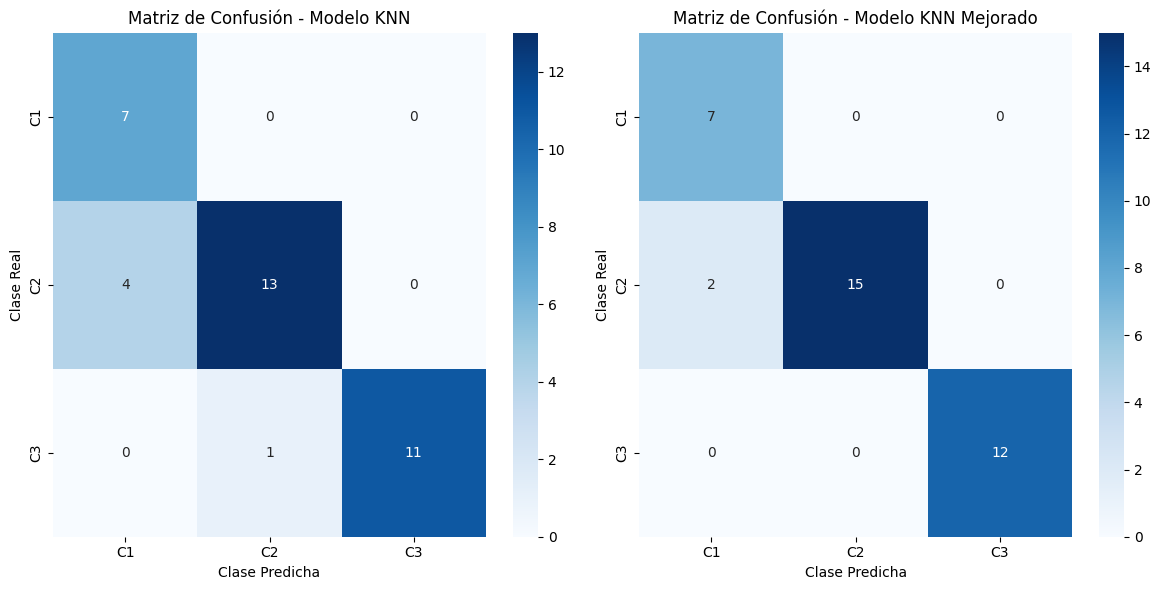

In [46]:
class_labels = ["C1", "C2","C3"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusión para el modelo KNN
sns.heatmap(matriz_confusion_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_xlabel("Clase Predicha")
axes[0].set_ylabel("Clase Real")
axes[0].set_title("Matriz de Confusión - Modelo KNN")

# Matriz de confusión para el modelo KNN Mejorado
sns.heatmap(matriz_confusion_knn_mej, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_xlabel("Clase Predicha")
axes[1].set_ylabel("Clase Real")
axes[1].set_title("Matriz de Confusión - Modelo KNN Mejorado")


plt.tight_layout()

plt.show()

Gracias a esta gráfica, podemos observar que la clasificación que hico el modelo mejorado es mucho mejor que la inicial. Se ha equivocado en 2 clasificaciones, versus a las 5 que se equivocó en el modelo inicial. Ahora vamos a observar con mayor detalle sus métricas. 

In [47]:
# Calculamos las métricas para el KNN inicial
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn_avg = precision_score(y_test, y_pred_knn, average='macro')
precision_knn = precision_score(y_test, y_pred_knn, average=None)
recall_knn_avg = recall_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average=None)
f1_score_knn_avg = f1_score(y_test, y_pred_knn, average='macro')
f1_score_knn = f1_score(y_test, y_pred_knn, average=None)


# Calculamos las métricas para el árbol de decisión modificado
accuracy_knn_mod = accuracy_score(y_test, y_pred_knn_mej)
precision_knn_mod_avg = precision_score(y_test, y_pred_knn_mej, average='macro')
precision_knn_mod = precision_score(y_test, y_pred_knn_mej, average=None)
recall_knn_mod_avg = recall_score(y_test, y_pred_knn_mej, average='macro')
recall_knn_mod = recall_score(y_test, y_pred_knn_mej, average=None)
f1_score_knn_mod_avg = f1_score(y_test, y_pred_knn_mej, average='macro')
f1_score_knn_mod = f1_score(y_test, y_pred_knn_mej, average=None)



# Creamos un DataFrame para comparar las métricas
data_knn = {
    "Modelo": ["KNN", "KNN Modificado"],
    "Accuracy": [accuracy_knn, accuracy_knn_mod],
    "Precision Media": [precision_knn_avg,precision_knn_mod_avg],
    "Precision Clase 1": [precision_knn[0],precision_knn_mod[0]],  # Precisión para la clase 0
    "Precision Clase 2": [precision_knn[1],precision_knn_mod[1]],  # Precisión para la clase 1
    "Precision Clase 3": [precision_knn[2], precision_knn_mod[2]], # Precisión para la clase 2
    "Recall media": [recall_knn_avg,recall_knn_mod_avg],
    "Recall Clase 1": [recall_knn[0],recall_knn_mod[0]],  # Recuperación para la clase 0
    "Recall Clase 2": [recall_knn[1],recall_knn_mod[1]], # Recuperación para la clase 1
    "Recall Clase 3": [recall_knn[2], recall_knn_mod[2]], # Recuperación para la clase 2
    "F1 Score media": [f1_score_knn_avg,f1_score_knn_mod_avg],
    "F1 Score Clase 1": [f1_score_knn[0],f1_score_knn_mod[0]],  # Puntuación F1 para la clase 0
    "F1 Score Clase 2": [f1_score_knn[1], f1_score_knn_mod[1]], # Puntuación F1 para la clase 1
    "F1 Score Clase 3": [f1_score_knn[2],f1_score_knn_mod[2]],  # Puntuación F1 para la clase 2
    #'Specificity': [specificity_arbol, specificity_knn]
}

df_knn_mod = pd.DataFrame(data_knn)
df_knn_mod = df_knn_mod.set_index("Modelo")
df_knn_mod.T

Modelo,KNN,KNN Modificado
Accuracy,0.861111,0.944444
Precision Media,0.854978,0.925926
Precision Clase 1,0.636364,0.777778
Precision Clase 2,0.928571,1.000000
Precision Clase 3,1.000000,1.000000
Recall media,0.893791,0.960784
Recall Clase 1,1.000000,1.000000
Recall Clase 2,0.764706,0.882353
Recall Clase 3,0.916667,1.000000
F1 Score media,0.857670,0.937500


In [48]:

# Creamos un DataFrame para comparar las métricas
data_mod = {
    "Modelo": ["Arbol de Decisión Modificado", "KNN Modificado"],
    "Accuracy": [accuracy_ab_mod, accuracy_knn_mod],
    "Precision Media": [precision_ab_mod_avg,precision_knn_mod_avg],
    "Precision Clase 1": [precision_ab_mod[0],precision_knn_mod[0]],  # Precisión para la clase 0
    "Precision Clase 2": [precision_ab_mod[1],precision_knn_mod[1]],  # Precisión para la clase 1
    "Precision Clase 3": [precision_ab_mod[2], precision_knn_mod[2]], # Precisión para la clase 2
    "Recall media": [recall_ab_mod_avg,recall_knn_mod_avg],
    "Recall Clase 1": [recall_ab_mod[0],recall_knn_mod[0]],  # Recuperación para la clase 0
    "Recall Clase 2": [recall_ab_mod[1],recall_knn_mod[1]], # Recuperación para la clase 1
    "Recall Clase 3": [recall_ab_mod[2], recall_knn_mod[2]], # Recuperación para la clase 2
    "F1 Score media": [f1_score_ab_mod_avg,f1_score_knn_mod_avg],
    "F1 Score Clase 1": [f1_score_ab_mod[0],f1_score_knn_mod[0]],  # Puntuación F1 para la clase 0
    "F1 Score Clase 2": [f1_score_ab_mod[1], f1_score_knn_mod[1]], # Puntuación F1 para la clase 1
    "F1 Score Clase 3": [f1_score_ab_mod[2],f1_score_knn_mod[2]],  # Puntuación F1 para la clase 2
    
}

df_ab_knn_mod = pd.DataFrame(data_mod)
df_ab_knn_mod = df_ab_knn_mod.set_index("Modelo")
df_ab_knn_mod.T

Modelo,Arbol de Decisión Modificado,KNN Modificado
Accuracy,0.944444,0.944444
Precision Media,0.938725,0.925926
Precision Clase 1,0.875000,0.777778
Precision Clase 2,0.941176,1.000000
Precision Clase 3,1.000000,1.000000
Recall media,0.952614,0.960784
Recall Clase 1,1.000000,1.000000
Recall Clase 2,0.941176,0.882353
Recall Clase 3,0.916667,1.000000
F1 Score media,0.943677,0.937500


Una vez comparados, podemos confirmar que a pesar de que ambos modelos han mejorado mucho con las modificaciones realizadas en algunos de sus hiperparámetros, el Modelo de Arbol de Decisión sigue siendo muchoo nás preciso y exacto a la hora de precedir la clasificación de nuestros datos del test.



### Ejercicio 5

**Aplica algún proceso de ingeniería para mejorar los resultados (normalización, estandarización, mostreo...)**

Para poder ajustar los valores ya hemos aplicado en este ejercicio anteriormente las técnicas de normalización para jercicio ya hemos aplicado la técnica de normalización en algunas variables y de estandarización en otras.

Hemos usado **MinMax** para estandarizar las variables que no tienen una distribución normal, pero que no tienen outliers: "Alcohol", "Total phenols","Flavanoids","Nonflavanoid phenols","OD280/OD315 of diluted wines" y "Proline".

También hemos usado **Standard Scaler** para normalizar la variable que tiene una distribución normal independientemente de que tenga outliers: "Alcalinity of Ash".

De manera que no tiene sentido volver a aplicarlo. 

Desde el principio del ejercicio me ha sorprendido que no hubiera la misma cantidad de registros para cada clase. Lo cual hace que sea más difícil para el modelo clasificar las categorías con menos muestras. Por ese motivo, creo que un proceso interesante que se podría aplicar una técnica de muestreo. Las técnicas que hay son el sobremuestreo (aumento de ejemplos de la clase minoritaria) o el submuestreo (reducción de ejemplos de la clase mayoritaria) para equilibrar las clases.

Pero con las técnicas aplicadas hasta el momento el modelo trabaja muy bien y tiene una buena precisión. 

En conclusión todos los modelos son muy acertados, pero yo usaría el modelo de Arbol de Decisión Modificado.